Здесь я подробно обрабатываю пропуски в данных, описываю их, рассуждаю. При этом с каждым признаком разбираюсь по отдельности.

В папке есть чужой код *other's job*, в ней примерно то же делается, что и в моей работе, но там не уделяется так много внимания рассмотрению каждого признака в отдельности. Наоборот, всё примерно обрабатывается дефолтно - и пропуски, и создание новых фич, и удаление лишних. Тот код имеет смысл читать для понимания того, как можно коротко делать тот большой объем работы, который выполнил я, если нет требования очень точно всё делать.

# Анализ данных

In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = pd.concat([df_train, df_test], axis=0)

pd.set_option('display.max_columns', None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
cat_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle',
                'OverallQual', 'OverallCond',
                'RoofStyle', 'RoofStyle',
                'Exterior1st', 'Exterior2st', 'MasVnrType', 'ExterQual', 'ExterCond',
                'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                'KitchenQual', 'Functional',
                'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                'PoolQC', 'Fence', 'MiscFeature',
                'SaleType', 'SaleCondition'
               ]
both_features = []
num_features = ['LotFrontage', 'LotArea',
                'YearBuilt', 'YearRemodAdd',
                'MasVnrArea',
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                'YrSold', 'MoSold'
               ]

## Описание фич

Сразу запишем на русском какие есть параметры:
- **Характеристики участка:**
    - MSSubClass - тип дома (одноэтажный, недостроенный...). Не очень простая категория для самостоятельного анализа. Точно можно сказать, что относительного порядка по соответсвующим типам числам нет, тип 60 не обязательно дешевле типа 120.
    - MSZoning - тип зоны, на которой стоит дом: сельская, городская...
    - LotFrontage, LotArea - длина и площадь фасада территории, то есть земли, принадлежащей хозяину дома.
    - Street - бинарный признак. Какая дорога прилегает к участку - асфальтированная или гравий.
    - Alley - то же, что и Street, но подъезд с задней стороны участка. Если NA, значит отсутствует.
    - LotShape - форма территории. Reg - нормальная, остальные IReg# - необычные. Чем более необычная, тем выше число от 1 до 3.
    - LandContour - рельеф участка. Ровный Lvl - лучше.
    - Utilities - наличие коммуникаций: электричество, вода... Имеет относительный порядок от большего к меньшему: AllPub, NoSewr, NoSeWa, ELO.
    - LotConfig - расположение участка: на углу, внутри квартала...
    - LandSlope - наклон участка. Пологий Gtl - лучше.
- **Местоположение:**
    - Neighborhood - район города Ame. Районы могут быть престижными или бедными.
    - Condition1, Condition2 - близость к различным объектам: парк, железная дорога.
- **Тип здания:**
    - BldgType - тип здания: на одну семью, на две, таунхаус...
    - HouseStyle - стиль здания по этажности: 1, 1.5 этажа... Очень похоже на MSSubClass, только MSSubClass - это классификация по каталогу, документам, а HouseStyle - фактическое устройство.
- **Качество и состояние дома:**
    - OverallQual - общее качество материалов и законченности дома. От 10 до 1.
    - OverallCond - общее состояние дома. От 10 до 1.
    - YearBuilt - год постройки дома.
    - YearRemodAdd - год реконструкции. Совпадает с постройкой, если ремонта не было.
- **Крыша:**
    - RoofStyle - тип крыши.
    - RoofMatle - материал крыши.
- **Наружняя отделка:**
    - Exterior1st, Exterior2st - основной и дополнительный материал внешней отделки.
    - MasVnrType - тип декоративной облицовки. None, если нет.
    - MasVnrArea - площадь декоративной облицовки.
    - ExterQual - качество материалов внешней отделки. Имеет относительный порядок от лучшего к худшему: Ex, Gd, TA, Fa, Po.
    - ExterCond - аналогично верхнему текущее состояние внешней отделки.
- **Фундамент и подвал:**
    - Foundation - тип фундамента.
    - BsmtQual - высота подвала. Имеет относительный порядок от лучшего к худшему: Ex (100″+), Gd (90-99″), TA (80-89″), Fa (70-79″), Po (<70″). NA - нет подвала.
    - BsmtCond - качество подвала. В основном про сырость. Аналогично верхнему.
    - BsmtExposure - есть ли окна, выход на улицу. Имеет относительный порядок от лучшего к худшему: Gd, Av, Mn, No. NA - нет подвала.
    - BsmtFinType1, BsmtFinType2 - завершенность подвала. Имеет относительный порядок от лучшего к худшему: GLQ, ALQ, BLQ,, Rec, LwQ, Unf. NA - нет подвала.
    - BsmtFinSF1, BsmtFinSF2 - площадь зон подвала из верхнего параметра.
    - BsmtUnfSF - площадь незаверенной части подвала. Есть подозрение, что имеет линейную зависимость с двумя верхними параметрами и нижним.
    - TotalBsmtSF - общая площадь подвала.
    - BsmtFullBath, BsmtHalfBath - количество полных и неполных ванн в подвале.
- **Отопление и электрика:**
    - Heating - тип отопления.
    - HeatingQC - состояние и качество отопления. Имеет относительный порядок от лучшего к худшему: Ex, Gd, TA, Fa, Po.
    - CentralAir - цетральное кодниционирование, бинарный признак.
    - Electrical - электропроводка.
- **Площади и комнаты над землей**
    - 1stFlrSF, 2ndFlrSF - площадь этажей.
    - LowQualFinSF - площадь низкокачественной завершенной площади на всех этажах.
    - GrLivArea - общая жилая площадь над землей.
    - FullBath, HalfBath - количество полных и неполных ванн над землей.
    - BedroomAbvGr - количество спален.
    - KitchenAbvGr - количество кухонь.
    - KitchenQual - качество кухонь. Имеет относительный порядок от лучшего к худшему: Ex, Gd, TA, Fa, Po.
    - TotRmsAbvGrd - всего комнат над землей (без ванн).
    - Functional - фунциональность дома: от типичной до аварийной и "только на запчасти". Имеет относительный порядок от лучшего к худшему: Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal.
- **Камин, гараж, двор:**
    - Fireplaces - количество каминов.
    - FireplaceQu - качество каминов. Имеет относительный порядок от лучшего к худшему: Ex, Gd, TA, Fa, Po. NA - отсутсвует.
    - GarageType - тип гаража. NA - отсутсвует.
    - GarageYrBlt - год постройки гаража.
    - GarageFinish - завершенность интерьера гаража. Имеет относительный порядок от лучшего к худшему: Fin, RFin, Unf. NA - отсутсвует гараж.
    - GarageCars - вместимость машин.
    - GarageArea - площадь гаража.
    - GarageQual - качество гаража. Имеет относительный порядок от лучшего к худшему: Ex, Gd, TA, Fa, Po. NA - отсутсвует.
    - GarageCond - состояние гаража. Имеет относительный порядок от лучшего к худшему: Ex, Gd, TA, Fa, Po. NA - отсутсвует.
    - PavedDrive - дорожка к дому. Y, P, N - есть, частично, нет.
- **Внешние постройки и зоны отдыха:**
    - WoodDeckSF - площадь деревянной террасы.
    - OpenPorchSF - площадь открытой веранды.
    - EnclosedPorch - площадь закрытой веранды.
    - 3SsnPorch - площадь веранды без отопления.
    - ScreenPorch - площадь веранды с сетками от москитов.
    - PoolArea - площадь бассейна.
    - PoolQC - качество бассейна. Имеет относительный порядок от лучшего к худшему: Ex, Gd, TA, Fa. NA - отсутсвует.
    - Fence - качество забора. GdPrv, MnPrv - хорошая и плохая приватность. GdWo, MnWw - хороший и плохой декоративный. NA - отсутсвует.
    - MiscFeature - прочие функции. NA - нет таких.
    - MiscVal - ценность в долларах прочих функций.
- **Информация о продаже:**
    - YrSold, MoSold - год и месяц продажи.
    - SaleType - тип сделки: новый дом, ипотека...
    - SaleCondition - обстоятельства продажи: между родственниками, недостроенный дом (типично для новых домов), обмен, обычная покупка... Выглядит очень важным параметром, но в котором с каждым занчением надо разбираться отдельно.

Данных очень много. Для начала просто посмотрим на распределения значений. Они могут нам понадобиться при обработке ошибочных выбросов и заполнении пропусков.
<br>
Сейчас даже на самом деле некоторые графики окажутся бесполезными как раз из-за NA, которые в каких-то признаках являются категорией. А какие-то графики, как MSSubClass вообще не так построятся из-за численного типа, в то время как это явно категориальный тип.

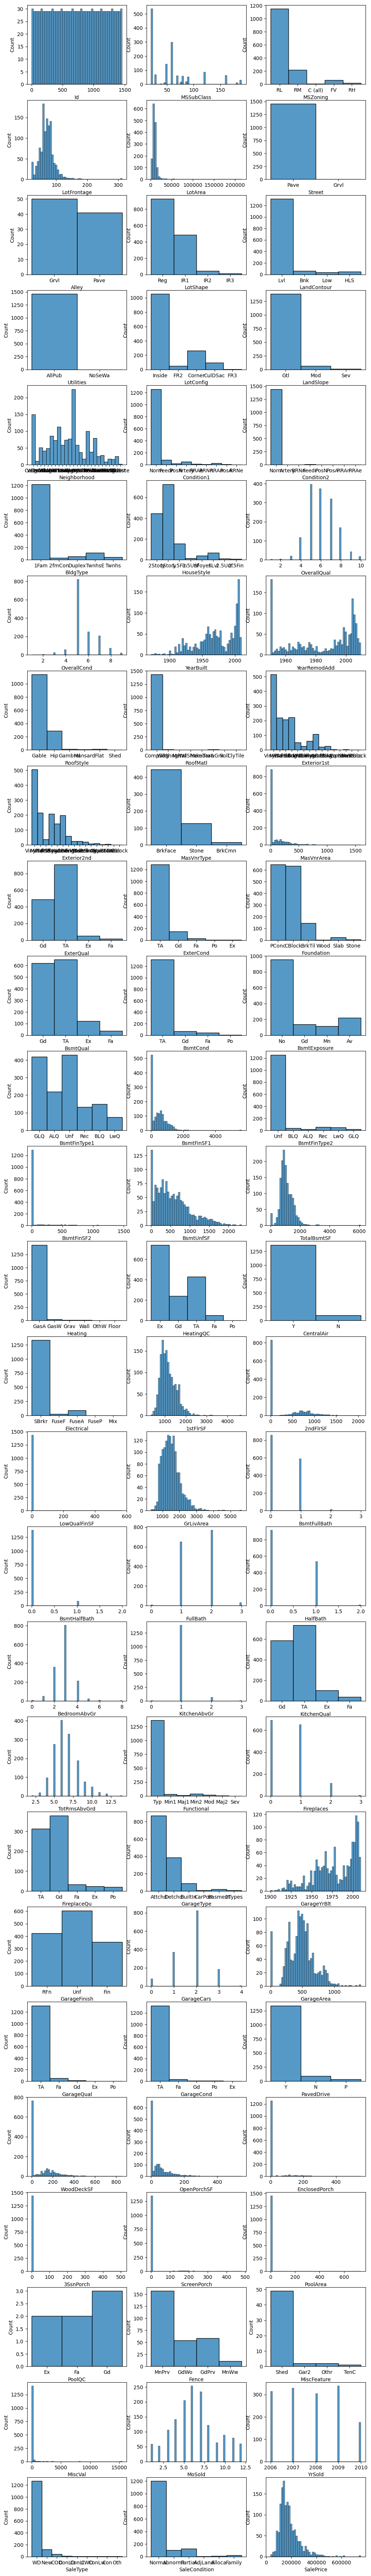

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(27, 3, figsize=(12, 91))
for num, col in enumerate(df_train.columns.to_list()):
    sns.histplot(data=df_train, x=col, bins=50, ax=axes[num // 3, num % 3])
plt.show()

## Обработка ошибочных данных

Сразу сменим тип данных у MSSubClass, так как это не числовой признак, а категориальный.

In [34]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')

Выведем значения всех параметров, находящиеся по краям их распределений.

In [5]:
for col in num_features:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5
    outliers = sorted(df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)][col].to_list())
    if len(outliers) > 0:
        print(col, ':', outliers, '\n-----')
    else:
        print(col, ':', df_train[col].min(), df_train[col].max(), '\n-----')

LotFrontage : [21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 112.0, 114.0, 114.0, 115.0, 115.0, 116.0, 116.0, 118.0, 118.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 121.0, 121.0, 122.0, 122.0, 124.0, 124.0, 128.0, 129.0, 129.0, 130.0, 130.0, 130.0, 134.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 174.0, 182.0, 313.0, 313.0] 
-----
LotArea : [1300, 1477, 17755, 17871, 17920, 18000, 18030, 18386, 18450, 18800, 18890, 19138, 19296, 19378, 19690, 19900, 20431, 20544, 20781, 20896, 21000, 21286, 21384, 21453, 21535, 21695, 21750, 21750, 21780, 21872, 21930, 22420, 22950, 23257, 23595, 24090, 24682, 25000, 25095, 25286, 25339, 25419, 26142, 26178, 27650, 28698, 29959, 31770, 32463, 32668, 34650, 35133, 35760, 36500, 39104, 40094, 456

Никаких подозрительных значений не найдено. Мы могли бы еще вывести самые частые значения признаков, чтобы найти ошибки не в выбросах, а на местах пропусков, заполненных неправильными константами (например, при отсутсвии гаража, вместо NA, найти GarageYrBlt = 0). Но в таком новичковом датасете таких ошибок нет, тем более мы убеждаемся в этом, когда далее заполняем пропуски самостоятельно.

Мы также могли бы посмотреть на возможные нелогичные комбинации признаков, например, GarageYrBlt < YearBlt, но и такого в новичковом датасете нет.

## Заполнение пропусков

### Train

Итак, заполним пропуски, глядя в описание признаков выше. Начнём с train и пойдем по порядку:
- LotFrontage - сложно сказать. Складывается впечатление, что просто не измерено значение, пропуск не несет особого значения, потому что у всех домов есть площадь участка LotArea. Тогда заполним медианой по группам Neighborhood, так как в одинаковых районах должны быть похожие планировки территорий. Убедиться в том, что группировка по районам имеет смысл можно на графике снизу. По нему видно, что медианы сильно меняются по районам. У большинства районов межквартильный размах (синие боксы) не сильный, значит можно действительно существует зависимость LotFrontage от района (бедный, богатый). В выводе мы видим, что в зависимости от района медиана меняется от 21 до 91, а общая 69. Это еще сильнее подтверждает, что медиану надо брать по районам, а не общую.

Min median: 21.0
Max median: 91.0
Overall median: 69.0


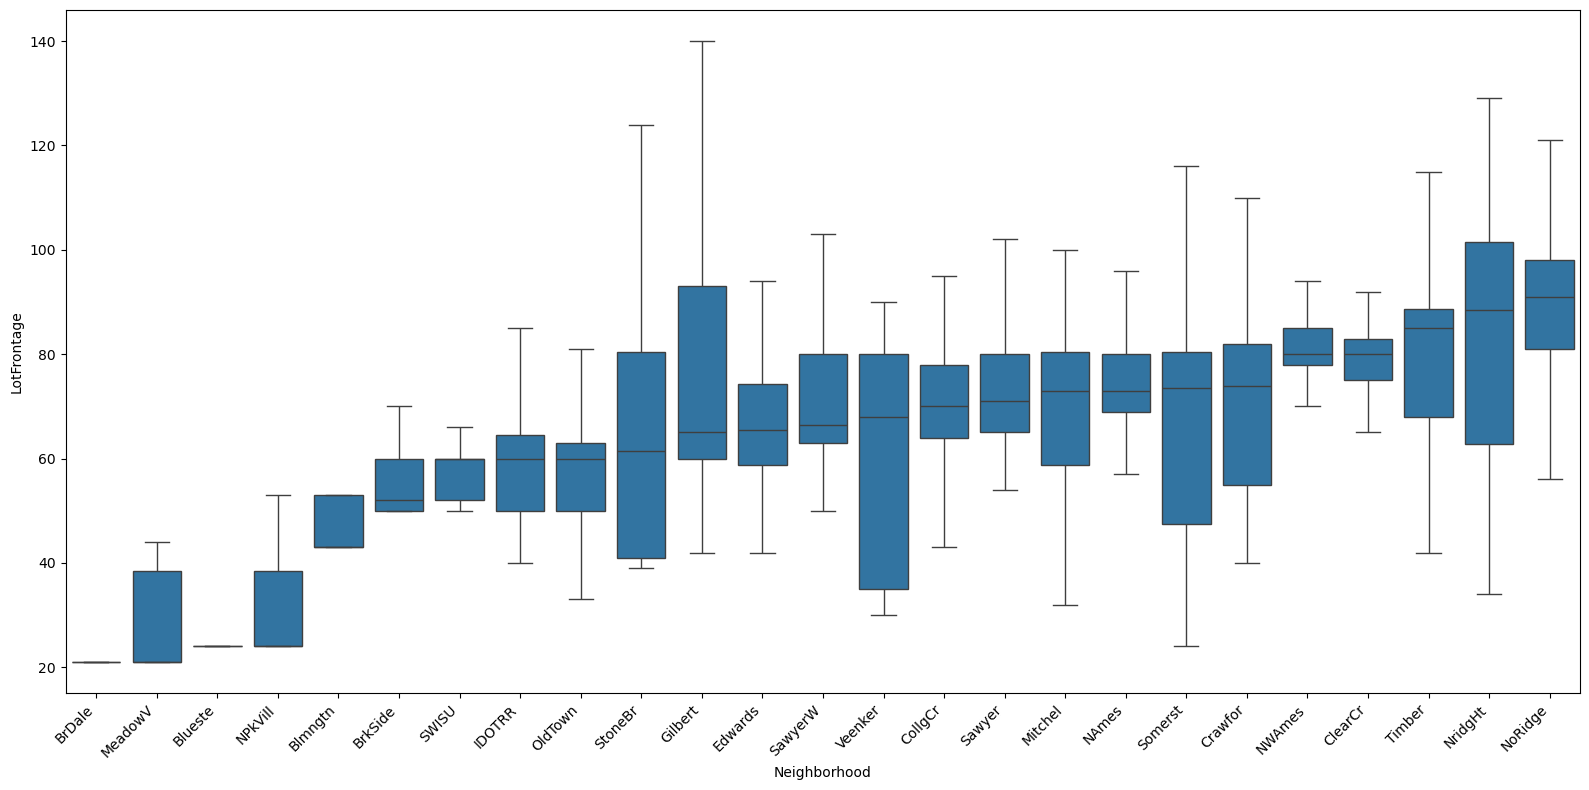

In [6]:
median_by_neigh = df_train.groupby('Neighborhood')['LotFrontage'].median()
print("Min median:", median_by_neigh.min())
print("Max median:", median_by_neigh.max())
print("Overall median:", df_train['LotFrontage'].median())

# График распределния LotFrontage по районам без отображения выбросов для удобства (showfliers=False)
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_train, x='Neighborhood', y='LotFrontage', order=median_by_neigh.sort_values().index, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Alley - NA значит, что дороги сзади дома нет. Это явно надо заполнить как "missing".
- MasVnrType - NA значит нет облицовки, заполняем "missing".
- MasVnrArea - если сделать df_train['MasVnrArea'].describe(), то можно увидеть, что большинство значений равны нулю. Можно предположить, что всем NA из MasVnrArea соответсвуют NA из MasVnrType. То есть, когда гаража нет, не записана его площадь. Тогда бы мы просто заполнили все пропуски 0. И при проверке ниже можно видеть, что действительно таких строчек столько же, сколько и пропусков всего - 8.

In [7]:
print(df_train['MasVnrArea'].describe(), '\n')
print('Cols, where MasVnrType = NA (no garage) and MasVnrArea = NA:', len(df_train[df_train['MasVnrArea'].isna() & df_train['MasVnrType'].isna()]))

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 

Cols, where MasVnrType = NA (no garage) and MasVnrArea = NA: 8


- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 - здесь почти полностью совпадает количество NA. Кроме того, ниже мы посмотрели на количество строк, где все эти признаки = NA, их 37. Это количество совпало с количеством NA у BsmtQual, BsmtCond и BsmtFinType1, которые имеют меньше остальных пропусков. Значит можно свободно считать, что везде, где BsmtQual = NA, подвала точно нет, и у всех Bsmt* признаков в данной строке можно писать "missing". Однако:
    1. Имеется всего одна строка, где BsmtExposure = NA, а остальные параметры написаны (найти её можно с помощью df_train[df_train['BsmtQual'].notna() & df_train['BsmtExposure'].isna()]). Я считаю это надо воспринимать как отсутсвие окна, то есть не "missing", как будто подвала вообще нет, а как "No" - нет окна.
    2. Имеется всего одна строка, где BsmtFinType2 = NA. Это просто значит, что это единственный подвал, у которого вся территория оценена одинаково по качеству. Мы эту строку тоже заполним "missing".

In [8]:
print('Rows where all features are NA:', len(df_train[df_train['BsmtQual'].isna() & df_train['BsmtCond'].isna() & df_train['BsmtExposure'].isna() & df_train['BsmtFinType1'].isna() & df_train['BsmtFinType2'].isna()]))
print('Rows where BsmtQual isn\'t NA and BsmtExposure is NA:', len(df_train[df_train['BsmtQual'].notna() & df_train['BsmtExposure'].isna()]))
print('Rows where BsmtQual isn\'t NA and BsmtFinType2 is NA:', len(df_train[df_train['BsmtQual'].notna() & df_train['BsmtFinType2'].isna()]))

Rows where all features are NA: 37
Rows where BsmtQual isn't NA and BsmtExposure is NA: 1
Rows where BsmtQual isn't NA and BsmtFinType2 is NA: 1


- Electrical - здесь явно просто не написали, так как у всех домов нет пропусков в Utilities, где худший вариант - ELO, когда только электричество есть. Найти эту строку можно с помощью df_train[df_train['Electrical'].isna()]. По этой строке дом выглядит обычным, Utilities = AllPub, то есть всё есть. Значит просто заполним строку модой.

In [9]:
df_train[df_train['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


- FireplaceQu - NA, если камина нет, значит заполняем "missing". Кстати, выше я этого не делал, но здесь ниже убедился, что если мне говорят в описании к данным, что NA значит камина нет, значит так оно и есть. А не то, что камин есть, а его качество просто не написали.

In [10]:
len(df_train[df_train['Fireplaces'] == 0]) == len(df_train[df_train['FireplaceQu'].isna()])

True

- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - имеют равное количество пропусков. Это значит, что NA - гаража нет.
    1. Заполняем GarageType, GarageFinish, GarageQual и GarageCond "missing".
    2. GarageYrBlt - это числовое поле. Его не заполнить "missing".
        1. Если мы работаем только с деревьями, можно ввести фиктивное значение, находящееся вне диапазона всех имеющихся значений, например, 0, -1 или 1899 при минимальном значении GarageYrBlt 1900. Так как деревья просто делят выборки, сравнивая по порогу как "<" или ">", и они выделят в одну группу дома без гаражей.
        2. Однако при работе с линейной регрессией или подобными моделями, которые подставляют в формулу значения параметра, фиктивное значение будет просто говорить "гараж построен в -1 году (или в 0, или в 1899)". Поэтому введём две новые фичи: $HasGarage = GarageYrBlt.notna()$ и $GarageYrBlt\_Centered = (GarageYrBlt - median()).fillna(0)$, что то же, что и $GarageYrBlt\_Centered = GarageYrBlt.fillna(median) - median$. Может показаться, что теперь дома без гаражей неотличимы от домов с медианным годом постройки гаража. На самом деле наличие фичи HasGarage регулирует эту ситуацию: $w_1*HasGarage+w_2*GarageYrBlt\_Centered$ - это вклад гаража и его года постройки.
            1. Если гараж есть, то его вклад - это $w_1*1+w_2*GarageYrBlt\_Centered$ = наличие гаража + отклонение года от типичного года.
            2. Если гаража нет, то его вклад - это $w_1*0+w_2*0=0$ = гаража нет + типичный год постройки.
            3. Если гараж медианный, то его вклад - это $w_1*1+w_2*0=w_1$ = наличие гаража.
           
           Если бы не было HasGarage, отсутствие гаража было бы неотличимо от наличия медианного. Кроме того, центрирование года гаража логичнее, чем просто год постройки, так как показывает насколько гараж отличается от типичного. И модель не работает с большими значениями.
- PoolQC - NA значит нет бассейна - это подтверждается тем, что во всех этих строчках PoolArea != 0. Надо бы заполнить "missing". Но если посмотреть на общее количество бассейнов - их 13. Конечно, бассейн должен увеличивать стоимость дома, и поэтому мы не будем удалять столбец PoolArea, который не содержит пропусков тем более. Но можно удалить столбец PoolQC, потому что он содержит до 4 категорий. Модель может не успеть научиться определять влияние этого признака. В то же время, One-Hot-Encoding создаст 4 столбца, которые почти полностью будут заполнены NA, что создаст разреженную таблицу с кучей шума. Древесные модели будут отвлекаться, тратить лишние решающие действия в узлах на эти столбцы.

In [11]:
print('Pools in train:', len(df_train[df_train['PoolArea'] != 0]))
print('Pools in test:', len(df_test[df_test['PoolArea'] != 0]))

Pools in train: 7
Pools in test: 6


- Fence - NA значит нет забора, заполняем "missing".
- MiscFeature - NA значит нет дополнительных особенностей, заполняем "missing". Однако в двух строках, где MiscFeature != NA, MiscValue == 0. Это дает нам обратную ситуацию, когда не пропуски ошибочны, а уже заполненные данные, так как стоимость дополнительных фишек не может быть равна 0. Ладно, когда доп фишки подписаны как Othr, но когда Shed (сарай), это явно ошибка. Это значит, что:
- В таких строках мы заменим MiscVal медианой по группам MiscFeature и OveralQual, так как MiscFeature говорит о типе фишки, а OveralQual зависит от этих фишек (как и фишки от него).

In [12]:
df_train[(df_train['MiscVal'] == 0) & df_train['MiscFeature'].notna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
873,874,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1949,1950,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Rec,375,Unf,0,457,832,GasA,Gd,Y,SBrkr,1036,0,232,1268,0,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1949.0,Unf,1,288,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000
1200,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,864,864,GasA,Gd,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml,116050


### Test

При заполнении test важно не допускать утечек данных. Для этого мы будем всегда брать статистики для заполнения из train.
- MSZoning - тип зоны определяет какие здания могут стоять на ней. А типы зданий заданы в MSSubClass, значит у этих признаков есть корреляция. Поэтому заполним пропуски модой по группам MSSubClass.
- LotFrontage - как в train
- Alley - как в train
- Utilities - по гистограмме выше мы можем видеть, что в df_train есть всего 2 значения Utilities - AllPub и NoSeWa, причем AllPub почти у всех домов. При этом у Utilities заявлено в описании признаков 4 значения. Выведем сколько раз какое значение встречается в данном признаке с помощью value_counts. Мы видим, что все дома, кроме одного имеют значение AllPub. Значит этот параметр - это практически константа. Модель не сможет научиться отделять значение NoSeWa, так как такой объект только один. Для нас это значит, что Utilities *не нужный* признак, константа, который только создает шум и мешает модели, особенно линейной со свободным членом. Мы должны удалить столбец Utilities.

In [13]:
print(df_train['Utilities'].value_counts(), '\n')
print(df_test['Utilities'].value_counts())

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

Utilities
AllPub    1457
Name: count, dtype: int64


- Exterior1st, Exterior2nd - обшивка физически не может отсутсвовать, значит это ошибочный пропуск. Пропуск всего один, можно сильно не думать и заполнить медианой, а можно предположить, что когда застройщик строит дома, он в одном и том же районе делает их похожими. Значит можно посчитать моду по группе Neighborhood.
- MasVnrType - как в train
- MasVnrArea - как и в train, проверим, что NA здесь значит, что гаража нет, то есть в этой же строчке стоит NA в MasVnrType для всех пропусков. Все верно, из 15 пропусков во всех NA совпадает с отсутсвием гаража в MasVnrType, значит заполняем 0.

In [14]:
print('Rows, where MasVnrType = NA (no garage) and MasVnrArea = NA:', len(df_test[df_test['MasVnrArea'].isna() & df_test['MasVnrType'].isna()]))

Rows, where MasVnrType = NA (no garage) and MasVnrArea = NA: 15


- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 - аналогично train, заполняем "missing" те строки, где все признаки NA, то есть согласованно сообщают, что подвала нет. Таких строк 42, значит в этот раз признаки BsmtFinType1 и BsmtFinType2, имеющие столько же пропусков, являются правильно заполненными, и по ним мы и будем оринетироваться при поиске ошибочных пропусков в остальных признаках. Далее для каждого признака выведем сторки, где пропуски ошибочны. По их Id можно видеть, что они не совпадают. Значит между их пропусками нет закономерности. Далее решаем как заполнять эти пропуски:
    1. Пропуски в BsmtQual и в BsmtCond заполним модой по группам OverallQual, так как это достаточно похожие признаки, только BsmtQual и BsmtCond отвечают только за качество подвала, а OverallQual за качество всего дома.
    2. С ошибочными пропусками в BsmtExposure все как в train - заполняем "No", то есть нет окна.

In [15]:
print('Rows where all features are NA:', len(df_test[df_test['BsmtQual'].isna() & df_test['BsmtExposure'].isna() & df_test['BsmtCond'].isna() & df_test['BsmtFinType1'].isna() & df_test['BsmtFinType2'].isna()]))

Rows where all features are NA: 42


In [16]:
print('Rows where BsmtFinType1 isn\'t NA and BsmtQual is NA')
df_test[df_test['BsmtFinType1'].notna() & df_test['BsmtQual'].isna()]

Rows where BsmtFinType1 isn't NA and BsmtQual is NA


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
757,2218,70,C (all),60.0,5280,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
758,2219,50,C (all),52.0,5150,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,PConc,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,1049,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal


In [17]:
print('Rows where BsmtFinType1 isn\'t NA and BsmtCond is NA')
df_test[df_test['BsmtFinType1'].notna() & df_test['BsmtCond'].isna()]

Rows where BsmtFinType1 isn't NA and BsmtCond is NA


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
580,2041,20,RL,103.0,16280,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1976,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Ex,Ex,CBlock,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA,Ex,Y,SBrkr,1671,0,0,1671,1.0,0.0,3,0,3,1,Ex,6,Typ,1,Gd,Attchd,1976.0,RFn,2.0,550.0,TA,TA,Y,280,90,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal
725,2186,20,RL,65.0,6500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,6,1976,1976,Hip,CompShg,HdBoard,Plywood,BrkFace,84.0,TA,TA,CBlock,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA,TA,Y,SBrkr,1127,0,0,1127,0.0,1.0,1,1,3,1,TA,6,Typ,1,Po,Detchd,1991.0,Unf,2.0,480.0,TA,TA,Y,0,0,138,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1064,2525,80,RL,72.0,9720,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,7,1977,1977,Gable,CompShg,Plywood,VinylSd,BrkFace,51.0,TA,TA,CBlock,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA,TA,Y,SBrkr,1009,0,0,1009,0.0,0.0,2,0,3,1,TA,6,Typ,1,Fa,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal


In [18]:
print('Rows where BsmtFinType1 isn\'t NA and BsmtExposure is NA')
df_test[df_test['BsmtFinType1'].notna() & df_test['BsmtExposure'].isna()]

Rows where BsmtFinType1 isn't NA and BsmtExposure is NA


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
27,1488,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
888,2349,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial


- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF - имеют по одному пропуску. Выведя строку с пропуском в BsmtFinSF1, видим, что здесь пропуски во всех признаках Bsmt*, значит подвал отсутсвует, и мы заполняем признаки площадей 0.

In [19]:
df_test[df_test['BsmtFinSF1'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


- BsmtFullBath, BsmtHalfBath - по два пропуска. Выведя строки, где оба признака NA, мы видим, что строки совпадают, а также то, что в этих строках все значения Bsmt* = NA, значит подвала нет, и мы заполняем 0.

In [20]:
df_test[df_test['BsmtFullBath'].isna() & df_test['BsmtHalfBath'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


- KitchenQual - один пропуск, заполним модой по группам OverallQual.
- Functional - 2 пропуска, заполним глобальной модой (то есть "Typ"), так как я не вижу связи этого признака с каким-то другим. Хотя я мог бы построить графики вида x=Functional, y=остальное, но этого многовато для двух пропусков.
- FireplaceQu - проверка снизу показала, что NA записано тогда же, когда количество каминов равно 0, заполняем "missing".

In [21]:
len(df_test[df_test['FireplaceQu'].isna() & (df_test['Fireplaces'] == 0)])

730

- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - код снизу показывает, что есть две строки, когда GarageType не NA, а другие 4 признака NA. Значит в этих строках ошибки, а не отсутствие гаража. Значит:
    1. Во всех строчках, где GarageType = NA, заполняем "missing" GarageType, GarageFinish, GarageQual и GarageCond. GarageYrBlt заполняем здесь как в train.
    2. В оставшихся двух строках GarageYrBlt заполняем значением из YearBlt, так как чаще всего дом строят одновременно с гаражом.
    3. В оставшихся двух строках GarageFinish, GarageQual и GarageCond заполняем либо глобальной медианой, либо по группам OverallQual, так как чаще всего хорошие дома имеют завершенный гараж и наоборот.

In [22]:
df_test[df_test['GarageType'].notna() & df_test['GarageYrBlt'].isna() & df_test['GarageFinish'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


- GarageCars, GarageArea - снизу видим, что в единственной строке с пропусками гаража нет, значит заполняем 0.

In [23]:
df_test[df_test['GarageCars'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


- PoolQC - удаляем, как в train.
- Fence - как в train.
- MiscFeature - видим, что ненулевых MiscVal столько же, сколько заполненных MiscFeature, значит остальные строки можно заполнить "missing".

In [24]:
len(df_test[df_test['MiscVal'] != 0])

51

- SaleType - пропуск всего один, так что можно заполнить глобальной модой. Если хочется точнее, то можно по группе SaleCondition.

## Создание новых фич, удаление лишних

### P.S. Обработка фич "для деревьев" vs "для линеной модели"

Сейчас мы обсудим любые способы обработки фич, и для линейной модели, и для деревьев.
<br>
Некоторые из этих обработок **вредны** или в лучшем случае не улучшают деревья, например, объединение редких значений, так как дерево и так не выберет сплит по редкой группе, если не увидит значительного прироста качества при таком сплите. Оно скорее просто объединит редкую группу с какой-нибудь другой. Ведь чаще всего сплиты, разделяющие выборку на малую часть и на большую часть будут иметь хуже эффект, чем более обобщающие сплиты на более сбалансированные части.

В дальнейшем обсуждении фич почти никогда не будет упоминаться для какой модели мы их обрабатываем, но по большей мере это будет для линейной, так как эта модель требовательнее к данным. Взглянем заранее в сравнительную таблицу обработок фич:
| Обработка / Признак                          | Деревья                     | Линейные модели            | Обоснование |
|---------------------------------------------|-----------------------------|----------------------------|-------------|
| **Ordinal encoding** (`*Qual`, `*Cond`)     | ✅ Нейтрально/полезно       | ✅ Обязательно             | Деревья не требуют чисел, но порядок помогает; линейные модели не работают со строками и теряют порядок при One-Hot. |
| **One-Hot Encoding**                        | ⚠️ Избыточно (>10 кат.)    | ✅ Нужно (номинальные)     | Деревья могут обойтись без него (CatBoost/XGBoost); линейные модели требуют One-Hot для номинальных признаков. |
| **Target encoding (KFold)**                 | ✅ Полезно (high-cardinality) | ✅ Очень полезно          | Обе модели выигрывают, если избежать утечки. Особенно для линейных. |
| **Удаление почти константных** (`Street`, `Utilities`, `RoofMatl`) | ✅ Да | ✅ Да | Шум и переобучение вредят обеим моделям. |
| **Объединение редких категорий** (<10 объектов) | ⚠️ Опционально (чистота) | ✅ Обязательно             | Для деревьев — не критично; для линейных — стабилизирует веса. |
| **Стандартизация / нормализация**           | ❌ Не нужна                 | ✅ Обязательно             | Деревья инвариантны к масштабу; линейные чувствительны к нему. |
| **Полиномиальные признаки** (`x²`, `x₁·x₂`) | ❌ Не нужны                 | ✅ Полезны                 | Деревья сами ловят нелинейности; линейные — только через явное создание. |
| **Логарифмирование `SalePrice`**            | ⚠️ Иногда помогает         | ✅ Часто помогает          | Стабилизирует дисперсию (цена скошена). Для деревьев — не критично. |
| **Удаление выбросов**                       | ❌ Не нужно (устойчивы)     | ⚠️ Осторожно — может помочь | Деревья устойчивы к выбросам; линейные — чувствительны, но выбросы могут быть реальными (особняки). |
| **Бинаризация редких признаков** (`HasPool`, `IsRemodeled`) | ✅ Полезно | ✅ Полезно | Упрощает интерпретацию и снижает шум — всегда оправдано. |
| **Создание агрегатов** (`TotalSF = GrLivArea + TotalBsmtSF`) | ✅ Полезно | ✅ Очень полезно | Обе модели ценят смысловые комбинации. |
| **Преобразование лет → возраст** (`BldgAge = YrSold - YearBuilt`) | ✅ Обязательно | ✅ Обязательно | Возраст информативнее года — для всех моделей.|
| **Биннинг (дискретизация)** | ❌ Не нужна | ✅ Полезна | Деревья сами делят выборки по порогу, сами находят нужные разделения; линейные модели могут не замечать отсутсвие линейности и монотонности, а также страдают от выбросов.|
| **Введение циклических признаков** (`MoSold => sin, cos`) | ✅ Иногда полезно | ✅ Обязательно | Деревья и сами могут разделить месяцы, часы по общим группам, но быстрее справятся с явным преобразованием; линейные и нейросети не могут увидеть цикличность в значениях самостоятельно |

### Обработка фич

Ранее мы уже отмечали, что *Utilities* практически является константой. Посмотрим внимательно на все графики, может получится сделать еще какие-то предположения относительно фич.
- Street - по графику видно, что значений Grvl (6) так мало, что можно воспринимать как константу (Pave - 1454), поэтому удалим.
- Utilities - тоже можно удалить: AllPub - 1459 и NoSeWa - 1.
- Neighborhood - проблем с этой фичей нет, но можно заменить её значения на порядковые с помощью KFold target encodning, так как категорий немало, значений в каждой тоже немало, и мы видим явную зависимость цены от района на графике в пункте "Заполнение пропусков".
- Condition2 - как будто тоже очень мало различных данных: Norm - 1445, остальные - 15. Кроме того, 87% значений из Condition1 совпадают со значениями из Condition2, то есть идёт дублирование информации. Можно попробовать удалить.
- YearBuilt - просто год постройки не очень удобное значение, так как нам скорее важно знать возраст дома во время его продажи, поэтому переделаем в $BldgAge = YrSold - YearBuilt$.
- YearRemodAdd - на графике видно, что значительная часть значений равна 0, то есть реконструкция не проводилась. Я не знаю хорошо ли иметь реконструкцию или нет, поэтому просто создам новый признак $IsRemodeled = (YearRemodAdd \neq YearBuilt)$. К этому я добавлю признак $RemodAge = np.where(IsRemodeled, YrSold - YearRemodAdd, 0)$, в котором реконструированные дома имеют возраст реконструкции, а дома без реконструкции имеют 0. Такой признак создает две похожие ситуации, когда год реконструкции совпадает с годом продажи и когда у дома не было реконструкции, и кажется, что модель не отличит эти ситуации, однако это не так. На линейную модель будет такое воздействие: $w_1*IsRemodeled+w_2*RemodAge$. И тогда у нас есть 3 ситуации: реконструкция была больше года назад = $w_1*1+w_2*RemodAge$, реконструкция была в год продажи = $w_1*1+w_2*0=w_1$, реконструкции не было = $w_1*0+w_2*0=0$. Древесная модель тоже спокойно разделит сплитом эти ситуации.
- RoofStyle - в этом признаке Gable - 1141, Hip - 286, а остальных в сумме 33. Можно попробовать остальные заменить на Other, чтобы не создавать много сплитов дереву и не создавать столбцы с OHE, заполненные в основном False. А можно попробовать заменить значения при помощи KFold (ordinal) traget encoding.
- RoofMatl - тоже как вариант удалить: CompShg - 1434, остальные - 26, которые мы не можем отделить в Other, так как в этих категориях разные типы материалы крыш - и дешевые, и дорогие.
- *Qual, *Cond и прочие признаки, имеющие значения с относительным порядком - для простоты мы можем заменить их на последовательные натуральные числа с сохранением порядка. Такой подход сохранит логику порядка в отличии от OHE и сохранит компактность данных, но будет немного не подходить линейной регрессии, так как для неё это будет значить, что значения имеют линейное отношение. Например, если дать Ex = 5, Gd = 4, TA = 3, ..., то линейная модель будет думать, что Ex на столько же лучше Gd, на сколько Gd лучше TA, хотя это почти никогда не так, ведь Ex могут присваивать люксовым домам, самым дорогим, а Gd и TA обычным. Как вариант мы можем попробовать задать значения с помощью KFold (ordinal) traget encoding, убедившись, что с ним относительный порядок не изменился.
- BsmtFinType#, BsmtFinSF# - как и у *Qual, заменим у BsmtFinType# значения на численные. Далее у древесной модели не должно быть проблем, так как она поймет связь BsmtFinType# с соответсвующим BsmtFinSF#, но у линейной проблемы возникнуть могут. Имеет смысл создать признак, являющийся комбинацией обеих. Например, $BsmtQual1 = \frac{BsmtFinType1 * BsmtFinSF1}{TotalBsmtSF}$ (с обработкой деления на 0). Тогда кажется, что BsmtFinType# и BsmtFinSF# отпадают, так как входят в новые признаки, но это не обязательно так.
- BsmtUnfSF - тоже можно попробовать преобразовать делением на TotalBsmtSF.
- Heating - тоже кандидат на удаление: GasA - 1428, остальные - 32. Однако, если посмотреть на средние цены в зависимости от отопления, можно видеть, что GasA сильно влияет на цены - это лучшее отопление. Значит объединим редкие позиции в Other и сделаем бинарный признак IsGasA.

In [67]:
print('Counts:\n', df_train['Heating'].value_counts(), '\n')
print('Mean SalePrice per heating type:\n', df_train.groupby('Heating')['SalePrice'].mean())

Counts:
 Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64 

Mean SalePrice per heating type:
 Heating
Floor     72500.000000
GasA     182021.195378
GasW     166632.166667
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000
Name: SalePrice, dtype: float64


- LowQualFinSF - всего 26 значений отличается от 0. Конечно, дома с низкокачественной завершенностью в среднем дешевле, но на гистограмме мы видим, что как будто найдётся 8 домов с ценой выше среднего, то есть треть (во многом из-за одного выброса). Можно попробовать превратить в бинарный признак, можно оставить как есть.

In [87]:
print('SalePrice with LowQualFinSF:', df_train[df_train['LowQualFinSF'] > 0]['SalePrice'].mean())
print('SalePrice with no LowQualFinSF:', df_train[df_train['LowQualFinSF'] == 0]['SalePrice'].mean())
print('SalePrice in general:', df_train['SalePrice'].mean())

SalePrice with LowQualFinSF: 152652.0
SalePrice with no LowQualFinSF: 181433.74755927475
SalePrice in general: 180921.19589041095


<Axes: xlabel='SalePrice', ylabel='Count'>

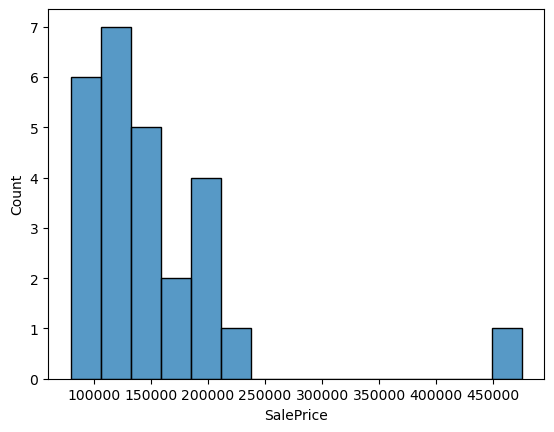

In [88]:
sns.histplot(df_train[df_train['LowQualFinSF'] > 0], x='SalePrice', bins=15)

- BsmtFullBath - видно, что домов с более чем 1 ванной мало. Мы посмотрели на средние и медианы цен по группировке по BsmtFullBath. Они показали, что цена точно растет при появлении 1 ванны, но с появлением второй ванны цена как будто не так сильно растет. В общем это говорит о нелинейном росте цены при росте числа ванн. Дом с 3 ваннами шум, так как всего один. Можно оставить признак как есть, только заменить значение "3" на "2". При желании можно сделать признак HasBsmtFullBath.

In [91]:
df_train['BsmtFullBath'].value_counts()

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

In [93]:
df_train.groupby('BsmtFullBath')['SalePrice'].median()

BsmtFullBath
0    154150.0
1    178800.0
2    188000.0
3    179000.0
Name: SalePrice, dtype: float64

In [94]:
df_train.groupby('BsmtFullBath')['SalePrice'].mean()

BsmtFullBath
0    165521.640187
1    202522.918367
2    213063.066667
3    179000.000000
Name: SalePrice, dtype: float64

- BsmtHalfBath - как видим, есть некоторое количество домов с половинными ваннами. Но при группировке по BamtHalfBath разницы в средней или медианной цене почти не видно. Тогда можно вообще удалить этот признак, ведь он почти не несет информации.

In [95]:
df_train['BsmtHalfBath'].value_counts()

BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64

In [96]:
df_train.groupby('BsmtHalfBath')['SalePrice'].mean()

BsmtHalfBath
0    181230.330189
1    176098.125000
2    160850.500000
Name: SalePrice, dtype: float64

In [97]:
df_train.groupby('BsmtHalfBath')['SalePrice'].median()

BsmtHalfBath
0    163250.0
1    159000.0
2    160850.5
Name: SalePrice, dtype: float64

- FullBath - ничего не нужно делать, увеличение количества ванн сильно влияет на цену дома.

In [100]:
df_train['FullBath'].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [99]:
df_train.groupby('FullBath')['SalePrice'].median()

FullBath
0    145000.0
1    132375.0
2    196750.0
3    320000.0
Name: SalePrice, dtype: float64

- HalfBath - влияение на цену есть, но странно выглядят 12 домов с 2 полуваннами. Может стоит их просто слить с домами с 1 полуванной.

In [102]:
df_train['HalfBath'].value_counts()

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

In [101]:
df_train.groupby('HalfBath')['SalePrice'].median()

HalfBath
0    143000.0
1    189000.0
2    159243.5
Name: SalePrice, dtype: float64

- KitchehAbvGr, KitchenQual - логично иметь признак $KitchenQualCount = KitchenAbvGr * KitchenQual$.
- Functional - сменить значения на числовые, так как есть относительный порядок. Видим, что есть очень редкие значения. Как вариант, их можно объединить в одно значение Other.

In [104]:
df_train['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

- Fireplaces, FireplaceQu - можно ввести $FireplaceQualCount = Fireplaces * FireplaceQu$.
- GarageType - есть два редких 2Types (6) и CarPort (9). Их нужно во что-то превратить, чтобы не иметь шум в данных. Превратим 2Types в Basment, а CarPort в Detchd по двум причинам:
    1. Медианы цен среди этих значений схожи.
    2. По смыслу 2Types (двухтипный) и Basment (подвальный) - необычные гаражи, а CarPort (навес без стен) и Detchd (отдельный) - оба не прикреплены к дому.

In [106]:
df_train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [107]:
df_train.groupby('GarageType')['SalePrice'].median()

GarageType
2Types     159000.0
Attchd     185000.0
Basment    148000.0
BuiltIn    227500.0
CarPort    108000.0
Detchd     129500.0
Name: SalePrice, dtype: float64

- GarageYrBlt - год ничего не говорит. По аналогии с YearRemodAge создать HasGarage и $GarageAge = np.where(HasGarage, YrSold - GarageYrBlt, 0)$.
- GarageCars, GarageArea - можно ввести $GarageAreaPerCar = GarageArea / GarageCars$ с обработкой деления на 0.
- GarageQual, GarageCond - редкие значения от худшего к 3 с конца объединим.

In [108]:
print(df_train['GarageQual'].value_counts())
print(df_train['GarageCond'].value_counts())

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


- EnclosedPorch - очень много значений равных 0 (1252), можно попробовать вместо этого признака создать HasEnclosedPorch.
- 3SsnPorch - еще больше значений равных 0 (1436), так что аналогично.
- PoolArea, PoolQC - существует всего 7 домов с бассейном. Наличие бассейна - это уже что-то необычное. Достаточно знать, что он есть, так что заменяем оба признака HasPool.
- MiscFeature - значений так мало, что кажется можно либо удалять, либо вводить вместо этого признак HasShed.
- MiscVal - 1408 значений равных 0. А по графику мы видим, что SalePrice кажется никак не зависит от MiscVal. Также и корреляция близка к 0. Получается, что признак просто бесполезен, хотя и кажется, что должен быть частью SalePrice. Его удаляем.

<Axes: xlabel='MiscVal', ylabel='SalePrice'>

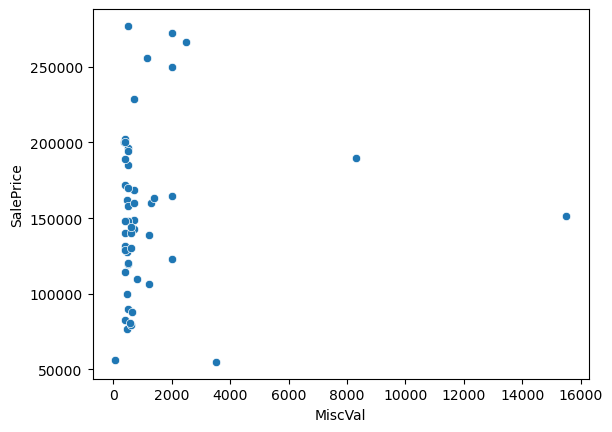

In [122]:
sns.scatterplot(df_train[df_train['MiscVal'] > 0], x='MiscVal', y='SalePrice')

In [121]:
df_train[['MiscVal', 'SalePrice']].corr()

,MiscVal,SalePrice
MiscVal,1.00000,-0.02119
SalePrice,-0.02119,1.00000


- YrSold - выглядит так же, как года постройки дома или гаража, и кажется, что можно удалять. Но на самом деле цены на дома могут меняться из-за внешних обстоятельств (кризис, миграция). Поэтому стоит превратить в категориальный признак, тем более, что всего есть 5 годов продажи.
- MoSold - выглядит как бесполезный признак, но может существует какая-то сезонность в ценах, которую деревья смогут отыскать? Так что просто заменим значения на циклические, чтобы 1 месяц и 12 не находились далеко по значениям друг от друга, когда в реальности это соседние месяцы. Сделаем это так: $MoSoldSin = \sin(2 * \pi * (MoSold - 1) / 12)$, $MoSoldCos = \cos(2 * \pi * (MoSold - 1) / 12)$. Так мы парой этих значений однозначно зададим месяцы на окружности.
- SaleType - редкие типы можно объединить в группы: все Con* (рассрочка на разных условиях), отдельно New, WD (ипотека) и COD. Oth и CWD (наличные) очень мало. Можно их заменить модой, как пропуски - глобальной или по группам SaleCondition.

In [124]:
df_train['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

- SaleCondition - можно редкие Family, Alloca и AdjLand объединить в Other.

In [125]:
df_train['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [126]:
df_train.groupby('SaleCondition')['SalePrice'].median()

SaleCondition
Abnorml    130000.0
AdjLand    104000.0
Alloca     148145.0
Family     140500.0
Normal     160000.0
Partial    244600.0
Name: SalePrice, dtype: float64

# Решение

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

class Transformator:
    def __init__(self):
        pass
    
    def error_correction(self, df_train, df_test):
        df_train['MSSubClass'] = df_train['MSSubClass'].astype('object')
        df_test['MSSubClass'] = df_test['MSSubClass'].astype('object')
        return df_train, df_test

    def fill_gaps_fit(self, df_train):
        self.lf_global_median = df_train['LotFrontage'].median()
        self.lf_median_by_neighborhood = df_train.groupby('Neighborhood')['LotFrontage'].median()
        self.electrical_global_mode = df_train['Electrical'].agg(pd.Series.mode).iloc[0]
        self.msz_mode_by_mssc = df_train.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.mode().iloc[0])
        self.msz_global_mode = df_train['MSZoning'].agg(pd.Series.mode).iloc[0]
        self.ext1_global_mode = df_train['Exterior1st'].agg(pd.Series.mode).iloc[0]
        self.ext2_global_mode = df_train['Exterior2nd'].agg(pd.Series.mode).iloc[0]
        self.bq_mode_by_oq = df_train.groupby('OverallQual')['BsmtQual'].apply(lambda x: x.mode().iloc[0])
        self.bq_global_mode = df_train['BsmtQual'].agg(pd.Series.mode).iloc[0]
        self.bc_mode_by_oq = df_train.groupby('OverallQual')['BsmtCond'].apply(lambda x: x.mode().iloc[0])
        self.bc_global_mode = df_train['BsmtCond'].agg(pd.Series.mode).iloc[0]
        self.kq_mode_by_oq = df_train.groupby('OverallQual')['KitchenQual'].apply(lambda x: x.mode().iloc[0])
        self.kq_global_mode = df_train['KitchenQual'].agg(pd.Series.mode).iloc[0]
        self.st_mode_by_sc = df_train.groupby('SaleCondition')['SaleType'].apply(lambda x: x.mode().iloc[0])
        self.st_global_mode = df_train['SaleType'].agg(pd.Series.mode).iloc[0]
        self.sp_global_median = df_train['SalePrice'].median()

    def fill_gaps_transform(self, df_train, df_test):
        df_train = df_train.copy()
        df_train['LotFrontage'].fillna(df_train['Neighborhood'].map(self.lf_median_by_neighborhood).fillna(self.lf_global_median), inplace=True)
        df_train['Alley'].fillna('missing', inplace=True)
        df_train['MasVnrType'].fillna('missing', inplace=True)
        df_train['MasVnrArea'].fillna(0, inplace=True)
        bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
        no_bsmt = df_train[bsmt_cols].isna().all(axis=1)
        df_train.loc[no_bsmt, bsmt_cols] = 'missing'
        df_train['BsmtExposure'].fillna('No', inplace=True)
        df_train['BsmtFinType2'].fillna('missing', inplace=True)
        df_train['Electrical'].fillna(self.electrical_global_mode, inplace=True)
        df_train['FireplaceQu'].fillna('missing', inplace=True)
        garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
        no_garage = df_train['GarageType'].isna()
        df_train.loc[no_garage, garage_cols] = 'missing'
        #df_train['GarageYrBlt'].fillna(-1, inplace=True) # этот столбец не нужен, вместо него создадим позже GarageAge, пропуски которого заполним отдельно
        #df_train.drop(['PoolQC'], inplace=True) # этот столбец не нужен, удалим в функции feature_engineering
        df_train['Fence'].fillna('missing', inplace=True)
        #df_train['MiscFeature'].fillna('missing', inplace=True)
        #MiscValue - мы собирались изначально исправлять ошибочные 0, когда MiscFeature != NA, но позже решили удялть этот столбик, так что не будем мучаться заполнением

        df_test = df_test.copy()
        df_test['MSZoning'].fillna(df_test['MSSubClass'].map(self.msz_mode_by_mssc).fillna(self.msz_global_mode), inplace=True)
        df_test['LotFrontage'].fillna(df_test['Neighborhood'].map(self.lf_median_by_neighborhood).fillna(self.lf_global_median), inplace=True)
        df_test['Alley'].fillna('missing', inplace=True)
        #df_test.drop(['Utilities'], inplace=True) # в будущем удалим в feature_engineering
        df_test['Exterior1st'].fillna(self.ext1_global_mode, inplace=True)
        df_test['Exterior2nd'].fillna(self.ext2_global_mode, inplace=True)
        df_test['MasVnrType'].fillna('missing', inplace=True)
        df_test['MasVnrArea'].fillna(0, inplace=True)
        no_bsmt = df_test[bsmt_cols].isna().all(axis=1)
        df_test.loc[no_bsmt, bsmt_cols] = 'missing'
        df_test['BsmtQual'].fillna(df_test['OverallQual'].map(self.bq_mode_by_oq).fillna(self.bq_global_mode), inplace=True)
        df_test['BsmtCond'].fillna(df_test['OverallCond'].map(self.bc_mode_by_oq).fillna(self.bc_global_mode), inplace=True)
        df_test['BsmtExposure'].fillna('No', inplace=True)
        bsmt_cols2 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
        no_bsmt2 = df_test['BsmtFinSF1'].isna()
        df_test.loc[no_bsmt2, bsmt_cols2] = 0
        bsmt_bath_cols = ['BsmtFullBath', 'BsmtHalfBath']
        no_bsmt_bath = df_test['BsmtFullBath'].isna()
        df_test.loc[no_bsmt_bath, bsmt_bath_cols] = 0
        df_test['KitchenQual'].fillna(df_test['OverallQual'].map(self.kq_mode_by_oq).fillna(self.kq_global_mode), inplace=True)
        df_test['Functional'].fillna('Typ', inplace=True)
        df_test['FireplaceQu'].fillna('missing', inplace=True)
        no_garage = df_test['GarageType'].isna()
        df_test.loc[no_garage, garage_cols] = 'missing'
        #df_test.loc[no_garage, 'GarageYrBlt'].fillna(-1, inplace=True) - этот столбец не нужен, но мы заполним оставшиеся 2 строки, где гараж есть по-другому
        has_garage_miss_other = df_test['GarageType'].notna() & df_test['GarageYrBlt'].isna()
        df_test.loc[has_garage_miss_other, 'GarageYrBlt'] = df_test.loc[has_garage_miss_other, 'YearBuilt']
        df_test.loc[has_garage_miss_other, 'GarageFinish'] = 'Unf' # здесь я просто по графику глянул глобальную моду
        df_test.loc[has_garage_miss_other, ['GarageQual', 'GarageCond']] = 'TA' # и здесь тоже
        df_test['GarageCars'].fillna(0, inplace=True)
        df_test['GarageArea'].fillna(0, inplace=True)
        #df_test.drop(['PoolQC'], inplace=True)
        df_test['Fence'].fillna('missing', inplace=True)
        #MiscFeature - потом удалим
        df_test['SaleType'].fillna(df_test['SaleCondition'].map(self.st_mode_by_sc).fillna(self.st_global_mode), inplace=True)
        return df_train, df_test

    def kfold_target_encoding(self, df_train, df_test, col, order=None):
        # Проверка на совпадение относительного порядка, полученного KFold, и реального (Po, Fa, TA, Gd, Ex)
        # Проверка ведется на всём train, а не на каждом фолде, так как отдельные фолды могут случайно не совпасть по порядку
        # а глобальная проверка более устойчива
        if order is not None:
            global_medians = df_train.groupby(col)['SalePrice'].median()
            common_cats = sorted([cat for cat in order.keys() if cat in global_medians.index], key=lambda x: order[x])
            medians = [global_medians[cat] for cat in common_cats]
            monotonic = all(medians[i - 1] <= medians[i] for i in range(1, len(medians)))
            if not monotonic:
                df_train[col + 'Encoded'] = df_train[col].map(order)
                df_test[col + 'Encoded'] = df_test[col].map(order)
                return pd.concat([df_train[col + 'Encoded'], df_test[col + 'Encoded']], axis=0)

        df_train[col + 'Encoded'] = np.nan
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        for train_idx, val_idx in skf.split(df_train, df_train[col]):
            X_tr = df_train.iloc[train_idx] # тренировочный фолд
            y_tr = df_train['SalePrice'].iloc[train_idx]
            X_val = df_train.iloc[val_idx] # валидационный фолд
            mapping = X_tr.groupby(col)['SalePrice'].median()
            df_train.loc[val_idx, col + 'Encoded'] = X_val[col].map(mapping).fillna(self.sp_global_median)
        global_mapping = df_train.groupby(col)['SalePrice'].median()
        df_test[col + 'Encoded'] = df_test[col].map(global_mapping).fillna(self.sp_global_median)
        return pd.concat([df_train[col + 'Encoded'], df_test[col + 'Encoded']], axis=0)

    def feature_engineering_transform(self, df_train, df_test, model_type='tree'):
        df_all = pd.concat([df_train, df_test], axis=0)
        train_part = df_train.copy()
        test_part = df_test.copy()
        df_all.drop(columns=['Street', 'Alley', 'Utilities'], inplace=True)
        df_all['NeighborhoodEncoded'] = self.kfold_target_encoding(train_part, test_part, 'Neighborhood')
        df_all.drop(columns=['Neighborhood'], inplace=True)
        df_all.drop(columns=['Condition2'], inplace=True)
        df_all['BldgAge'] = df_all['YrSold'] - df_all['YearBuilt']
        df_all['IsRemodeled'] = df_all['YearRemodAdd'] != df_all['YearBuilt']
        df_all['RemodAge'] = np.where(df_all['IsRemodeled'], df_all['YrSold'] - df_all['YearRemodAdd'], 0)
        df_all.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)
        df_all['OverallQualEncoded'] = self.kfold_target_encoding(train_part, test_part, 'OverallQual', {i: i for i in range(1, 11)})
        df_all['OverallCondEncoded'] = self.kfold_target_encoding(train_part, test_part, 'OverallCond', {i: i for i in range(1, 11)})
        df_all.drop(columns=['OverallQual', 'OverallCond'], inplace=True)
        if model_type == 'linear': # можно и для деревьев
            df_all['RoofStyle'] = df_all['RoofStyle'].where(df_all['RoofStyle'].isin({'Gable', 'Hip'}), 'Other')
        df_all.drop(columns=['RoofMatl'], inplace=True)
        qual_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
        qual_value_to_num = {'missing': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
        for f in qual_features:
            df_all[f + 'Encoded'] = self.kfold_target_encoding(train_part, test_part, f, qual_value_to_num)
        df_all.drop(columns=qual_features, inplace=True)
        df_all['BsmtExposureEncoded'] = self.kfold_target_encoding(train_part, test_part, 'BsmtExposure', {'missing': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
        df_all.drop(columns=['BsmtExposure'], inplace=True)
        df_all['BsmtFinType1Encoded'] = self.kfold_target_encoding(train_part, test_part, 'BsmtFinType1', {'missing': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
        df_all['BsmtFinType2Encoded'] = self.kfold_target_encoding(train_part, test_part, 'BsmtFinType2', {'missing': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
        df_all.drop(columns=['BsmtFinType1', 'BsmtFinType2'], inplace=True)
        if model_type == 'linear':
            df_all['BsmtQual1'] = np.where(df_all['TotalBsmtSF'] > 0, df_all['BsmtFinType1Encoded'] * df_all['BsmtFinSF1'] / df_all['TotalBsmtSF'], 0)
            df_all['BsmtQual2'] = np.where(df_all['TotalBsmtSF'] > 0, df_all['BsmtFinType2Encoded'] * df_all['BsmtFinSF2'] / df_all['TotalBsmtSF'], 0)
            df_all['BsmtUnfSF'] = np.where(df_all['TotalBsmtSF'] > 0, df_all['BsmtUnfSF'] / df_all['TotalBsmtSF'], 0)
        df_all['IsGasA'] = df_all['Heating'] == 'GasA'
        df_all.drop(columns=['Heating'], inplace=True)
        df_all['HasLowQualFinSF'] = df_all['LowQualFinSF'] == 0
        df_all.drop(columns=['LowQualFinSF'], inplace=True)
        df_all['BsmtFullBath'] = df_all['BsmtFullBath'].clip(upper=2)
        df_all.drop(columns=['BsmtHalfBath'], inplace=True)
        df_all['HalfBath'] = df_all['HalfBath'].clip(upper=1)
        if model_type == 'linear':
            df_all['KitchenQualCount'] = df_all['KitchenAbvGr'] * df_all['KitchenQualEncoded']
        df_all['Functional'] = df_all['Functional'].replace({'Sev': 'Maj1', 'Maj2': 'Maj1'})
        train_part['Functional'] = train_part['Functional'].replace({'Sev': 'Maj1', 'Maj2': 'Maj1'})
        test_part['Functional'] = test_part['Functional'].replace({'Sev': 'Maj1', 'Maj2': 'Maj1'})
        df_all['FunctionalEncoded'] = self.kfold_target_encoding(train_part, test_part, 'Functional', {'missing': 0, 'Maj1': 1, 'Mod': 2, 'Min2': 3, 'Min1': 4, 'Typ': 5})
        df_all.drop(columns=['Functional'], inplace=True)
        if model_type == 'linear':
            df_all['FireplaceQualCount'] = df_all['Fireplaces'] * df_all['FireplaceQu']
        df_all['GarageType'] = df_all['GarageType'].replace({'2Types': 'Basment', 'CarPort': 'Detchd'})
        df_all['HasGarage'] = df_all['GarageYrBlt'].notna()
        df_all['GarageAge'] = np.where(df_all['HasGarage'], df_all['YrSold'] - df_all['GarageYrBlt'], 0)
        df_all.drop(columns=['GarageYrBlt'], inplace=True)
        if model_type == 'linear':
            df_all['GarageAreaPerCar'] = np.where(df_all['GarageCars'] > 0, df_all['GarageArea'] / df_all['GarageCars'], 0)
        df_all['GarageFinishEncoded'] = self.kfold_target_encoding(train_part, test_part, 'GarageFinish', {'missing': 0, 'Unf': 1, 'RFin': 2, 'Fin': 3})
        df_all.drop(columns=['GarageFinish'], inplace=True)
        df_all['HasEnclosedPorch'] = df_all['EnclosedPorch'] > 0
        df_all.drop(columns=['EnclosedPorch'], inplace=True)
        df_all['Has3SsnPorch'] = df_all['3SsnPorch'] > 0
        df_all.drop(columns=['3SsnPorch'], inplace=True)
        df_all['HasPool'] = df_all['PoolArea'] > 0
        df_all.drop(columns=['PoolArea', 'PoolQC'], inplace=True)
        df_all['HasShed'] = df_all['MiscFeature'] == 'Shed'
        df_all.drop(columns=['MiscFeature', 'MiscVal'], inplace=True)
        df_all['YrSold'] = df_all['YrSold'].astype('category')
        df_all['MoSoldSin'] = np.sin(2 * np.pi * (df_all['MoSold'] - 1) / 12)
        df_all['MoSoldCos'] = np.cos(2 * np.pi * (df_all['MoSold'] - 1) / 12)
        df_all.drop(columns=['MoSold'], inplace=True)
        df_all['SaleType'] = df_all['SaleType'].replace({'ConLD': 'Con', 'ConLI': 'Con', 'ConLw': 'Con', 'CWD': 'WD', 'Oth': 'WD'})
        df_all['SaleCondition'] = df_all['SaleCondition'].replace({'Family': 'Other', 'Alloca': 'Other', 'AdjLand': 'Other'})
        return df_all[:len(df_train)], df_all[len(df_train):].drop(columns=['SalePrice'])

    def finish_fill_gaps_transform(self, df_train, df_test):
        df_train = df_train.copy()
        df_train['HasGarage'] = df_train['GarageYrBlt'].notna()
        df_train['GarageAge'] = np.where(df_train['HasGarage'], df_train['YrSold'] - df_train['GarageYrBlt'], 0)
        df_train.drop(columns=['GarageYrBlt'], inplace=True)
        df_train['PoolQC'].fillna('missing', inplace=True)
        df_train['MiscFeature'].fillna('missing', inplace=True)
        df_train['BldgAge'] = df_train['YrSold'] - df_train['YearBuilt']
        df_train['IsRemodeled'] = df_train['YearRemodAdd'] != df_train['YearBuilt']
        df_train['RemodAge'] = np.where(df_train['IsRemodeled'], df_train['YrSold'] - df_train['YearRemodAdd'], 0)
        df_train.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)
        
        df_test = df_test.copy()
        df_test['Utilities'].fillna('AllPub', inplace=True)
        df_test['HasGarage'] = df_test['GarageYrBlt'].notna()
        df_test['GarageAge'] = np.where(df_test['HasGarage'], df_test['YrSold'] - df_test['GarageYrBlt'], 0)
        df_test.drop(columns=['GarageYrBlt'], inplace=True)
        df_test['PoolQC'].fillna('missing', inplace=True)
        df_test['MiscFeature'].fillna('missing', inplace=True)
        df_test['BldgAge'] = df_test['YrSold'] - df_test['YearBuilt']
        df_test['IsRemodeled'] = df_test['YearRemodAdd'] != df_test['YearBuilt']
        df_test['RemodAge'] = np.where(df_test['IsRemodeled'], df_test['YrSold'] - df_test['YearRemodAdd'], 0)
        df_test.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)
        return df_train, df_test

    def fit(self, df_train):
        self.fill_gaps_fit(df_train)

    def transform(self, df_train, df_test, model_type='tree', with_feature_eng=True):
        train_part = df_train.copy()
        test_part = df_test.copy()
        train_part, test_part = self.error_correction(train_part, test_part)
        train_part, test_part = self.fill_gaps_transform(train_part, test_part)
        if with_feature_eng:
            return self.feature_engineering_transform(train_part, test_part, model_type)
        else:
            return self.finish_fill_gaps_transform(train_part, test_part)

    def fit_transform(self, df_train, df_test, model_type='tree', with_feature_eng=True):
        self.fit(df_train)
        return self.transform(df_train, df_test, model_type=model_type, with_feature_eng=with_feature_eng)

## Baseline

Только заполним пропуски, введем *Age* вместо *Year*.

In [71]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [72]:
transformator = Transformator()
df_train, df_test = transformator.fit_transform(df_train, df_test, with_feature_eng=False)

C:\Users\Dantesto\AppData\Local\Temp\ipykernel_1124\2871353450.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LotFrontage'].fillna(df_train['Neighborhood'].map(self.lf_median_by_neighborhood).fillna(self.lf_global_median), inplace=True)
C:\Users\Dantesto\AppData\Local\Temp\ipykernel_1124\2871353450.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work bec

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   object 
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Random Forest

In [14]:
from sklearn.preprocessing import OneHotEncoder

def ohe(df_train, df_test):
    df_train1 = df_train.copy()
    df_test1 = df_test.copy()
    cat_cols = df_train1.select_dtypes(include=['object', 'category']).columns.tolist()
    # Инициализируем энкодер
    ohe = OneHotEncoder(
        drop='first',          # или None; 'first' убирает 1 столбец для избежания мультиколлинеарности
        sparse_output=False,   # возвращаем массив, а не sparse-матрицу
        handle_unknown='ignore'  # игнорировать неизвестные категории в test
    )
    # Обучаем на train и преобразуем
    train_cat_ohe = ohe.fit_transform(df_train1[cat_cols])
    test_cat_ohe = ohe.transform(df_test1[cat_cols])
    # Получаем имена новых колонок
    feature_names = ohe.get_feature_names_out(cat_cols)
    train_cat_df = pd.DataFrame(train_cat_ohe, columns=feature_names, index=df_train1.index)
    test_cat_df = pd.DataFrame(test_cat_ohe, columns=feature_names, index=df_test1.index)
    # Удаляем исходные категориальные колонки и добавляем закодированные
    df_train1 = pd.concat([df_train1.drop(columns=cat_cols), train_cat_df], axis=1)
    df_test1 = pd.concat([df_test1.drop(columns=cat_cols), test_cat_df], axis=1)
    return df_train1, df_test1

In [15]:
from sklearn.ensemble import RandomForestRegressor

df_train1, df_test1 = ohe(df_train, df_test)
model = RandomForestRegressor()
model.fit(df_train1.drop(columns=['SalePrice', 'Id']), np.log(df_train1['SalePrice']))

C:\Users\Dantesto\.conda\envs\Env0\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RandomForestRegressor()

In [16]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(np.exp(model.predict(df_train1.drop(columns=['SalePrice', 'Id']))), df_train1['SalePrice'])))

10968.72662928182


In [17]:
predictions = np.exp(model.predict(df_test1.drop(columns='Id')))

In [18]:
submission = pd.DataFrame({
    'Id': df_test1['Id'],
    'SalePrice': predictions
})
submission.to_csv('baseline_rf_submission.csv', index=False)

### CatBoost

In [19]:
from catboost import CatBoostRegressor

df_train1, df_test1 = df_train.copy(), df_test.copy()
model = CatBoostRegressor(eval_metric='RMSE', random_seed=42, verbose=False, iterations=1000, cat_features=df_train1.select_dtypes(include=['object', 'category']).columns.tolist())
model.fit(df_train1.drop(columns=['SalePrice', 'Id']), np.log(df_train1['SalePrice']))

In [20]:
print(np.sqrt(mean_squared_error(np.exp(model.predict(df_train1.drop(columns=['SalePrice', 'Id']))), df_train1['SalePrice'])))

13069.28388433304


In [21]:
predictions = np.exp(model.predict(df_test1.drop(columns='Id')))

In [22]:
submission = pd.DataFrame({
    'Id': df_test1['Id'],
    'SalePrice': predictions
})
submission.to_csv('baseline_cbr_submission.csv', index=False)

### Linear

In [76]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

df_train1, df_test1 = ohe(df_train, df_test)
to_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageAge', 'BldgAge', 'RemodAge']
scaler = StandardScaler()
df_train1[to_scale] = scaler.fit_transform(df_train1[to_scale])
df_test1[to_scale] = scaler.transform(df_test1[to_scale])
model = Ridge()
model.fit(df_train1.drop(columns=['SalePrice', 'Id']), np.log(df_train1['SalePrice']))

C:\Users\Dantesto\.conda\envs\Env0\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Ridge()

In [77]:
print(np.sqrt(mean_squared_error(np.exp(model.predict(df_train1.drop(columns=['SalePrice', 'Id']))), df_train1['SalePrice'])))

20942.734938954647


In [78]:
predictions = np.exp(model.predict(df_test1.drop(columns='Id')))

In [79]:
submission = pd.DataFrame({
    'Id': df_test1['Id'],
    'SalePrice': predictions
})
submission.to_csv('baseline_lr_submission.csv', index=False)

## Feature Engineering

In [83]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train, df_test = transformator.fit_transform(df_train, df_test)

C:\Users\Dantesto\AppData\Local\Temp\ipykernel_1124\2871353450.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LotFrontage'].fillna(df_train['Neighborhood'].map(self.lf_median_by_neighborhood).fillna(self.lf_global_median), inplace=True)
C:\Users\Dantesto\AppData\Local\Temp\ipykernel_1124\2871353450.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work bec

In [81]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,...,FunctionalEncoded,HasGarage,GarageAge,GarageFinishEncoded,HasEnclosedPorch,Has3SsnPorch,HasPool,HasShed,MoSoldSin,MoSoldCos
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,Norm,...,5,True,5.0,12.165251,False,False,False,False,0.500000,0.866025
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Feedr,...,5,True,31.0,12.157404,False,False,False,False,0.866025,-0.500000
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,Norm,...,5,True,7.0,12.154779,False,False,False,False,-0.866025,-0.500000
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Norm,...,5,True,8.0,11.813030,True,False,False,False,0.500000,0.866025
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,Norm,...,5,True,8.0,12.138864,False,False,False,False,-0.500000,0.866025


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   object  
 2   MSZoning             1460 non-null   object  
 3   LotFrontage          1460 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   LotShape             1460 non-null   object  
 6   LandContour          1460 non-null   object  
 7   LotConfig            1460 non-null   object  
 8   LandSlope            1460 non-null   object  
 9   Condition1           1460 non-null   object  
 10  BldgType             1460 non-null   object  
 11  HouseStyle           1460 non-null   object  
 12  RoofStyle            1460 non-null   object  
 13  Exterior1st          1460 non-null   object  
 14  Exterior2nd          1460 non-null   object  
 15  MasVnrType           1460 

### RandomForest

In [50]:
df_train1, df_test1 = ohe(df_train, df_test)
model = RandomForestRegressor()
model.fit(df_train1.drop(columns=['SalePrice', 'Id']), df_train1['SalePrice'])

C:\Users\Dantesto\.conda\envs\Env0\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RandomForestRegressor()

In [52]:
print(np.sqrt(mean_squared_error(model.predict(df_train1.drop(columns=['SalePrice', 'Id'])), df_train1['SalePrice'])))

0.05192206923304246


In [53]:
predictions = np.exp(model.predict(df_test1.drop(columns='Id')))

In [54]:
submission = pd.DataFrame({
    'Id': df_test1['Id'],
    'SalePrice': predictions
})
submission.to_csv('full_rf_submission.csv', index=False)

### CatBoost

In [55]:
from catboost import CatBoostRegressor

df_train1, df_test1 = df_train.copy(), df_test.copy()
model = CatBoostRegressor(eval_metric='RMSE', random_seed=42, verbose=False, iterations=1000, cat_features=df_train1.select_dtypes(include=['object', 'category']).columns.tolist())
model.fit(df_train1.drop(columns=['SalePrice', 'Id']), df_train1['SalePrice'])

In [56]:
print(np.sqrt(mean_squared_error(model.predict(df_train1.drop(columns=['SalePrice', 'Id'])), df_train1['SalePrice'])))

0.058550103045525


In [57]:
predictions = np.exp(model.predict(df_test1.drop(columns='Id')))

In [58]:
submission = pd.DataFrame({
    'Id': df_test1['Id'],
    'SalePrice': predictions
})
submission.to_csv('full_cbr_submission.csv', index=False)

### Linear

In [84]:
df_train1, df_test1 = ohe(df_train, df_test)
to_scale_eng = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'BldgAge', 'RemodAge', 'GarageAge']
scaler = StandardScaler()
df_train1[to_scale_eng] = scaler.fit_transform(df_train1[to_scale_eng])
df_test1[to_scale_eng] = scaler.transform(df_test1[to_scale_eng])
model = Ridge()
model.fit(df_train1.drop(columns=['SalePrice', 'Id']), df_train1['SalePrice'])

C:\Users\Dantesto\.conda\envs\Env0\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Ridge()

In [85]:
print(np.sqrt(mean_squared_error(model.predict(df_train1.drop(columns=['SalePrice', 'Id'])), df_train1['SalePrice'])))

0.11466603278508282


In [86]:
predictions = np.exp(model.predict(df_test1.drop(columns='Id')))

In [87]:
submission = pd.DataFrame({
    'Id': df_test1['Id'],
    'SalePrice': predictions
})
submission.to_csv('full_lr_submission.csv', index=False)

## Stacking

Сделаем стекинг моделей.

In [99]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train1, df_test1 = transformator.fit_transform(df_train, df_test)

C:\Users\Dantesto\AppData\Local\Temp\ipykernel_1124\2871353450.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LotFrontage'].fillna(df_train['Neighborhood'].map(self.lf_median_by_neighborhood).fillna(self.lf_global_median), inplace=True)
C:\Users\Dantesto\AppData\Local\Temp\ipykernel_1124\2871353450.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work bec

In [100]:
from sklearn.model_selection import KFold

def stacking(df_train, df_test, models, need_ohe, need_scaler, n_folds=5):
    train_meta = np.zeros((len(df_train), len(models)))
    test_meta = np.zeros((len(df_test), len(models)))
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    for i, model in enumerate(models):
        df_train1, df_test1 = df_train.copy(), df_test.copy()
        if need_ohe[i]:
            df_train1, df_test1 = ohe(df_train1, df_test1)
        if need_scaler[i]:
            to_scale_eng = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'BldgAge', 'RemodAge', 'GarageAge']
            scaler = StandardScaler()            
            df_train1[to_scale_eng] = scaler.fit_transform(df_train1[to_scale_eng])
            df_test1[to_scale_eng] = scaler.transform(df_test1[to_scale_eng])
        X_train, y_train = df_train1.drop(columns=['Id', 'SalePrice']), df_train1['SalePrice']
        X_test = df_test1.drop(columns=['Id'])
        test_pred = np.zeros(len(X_test))
        for train_idx, val_idx in kf.split(X_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]
            model.fit(X_tr, y_tr)
            val_pred = model.predict(X_val)
            test_pred += model.predict(X_test) / n_folds
            train_meta[val_idx, i] = val_pred
        test_meta[:, i] = test_pred
    meta_model = Ridge()
    meta_model.fit(train_meta, df_train['SalePrice'])
    y_pred = np.exp(meta_model.predict(test_meta))
    return y_pred

In [106]:
predictions = stacking(df_train1, df_test1, [RandomForestRegressor(), CatBoostRegressor(eval_metric='RMSE', random_seed=42, verbose=False, iterations=1000, cat_features=df_train1.select_dtypes(include=['object', 'category']).columns.tolist()), Ridge()], [True, False, True], [False, False, True])

C:\Users\Dantesto\.conda\envs\Env0\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dantesto\.conda\envs\Env0\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [107]:
submission = pd.DataFrame({
    'Id': df_test1['Id'],
    'SalePrice': predictions
})
submission.to_csv('full_stacking_submission.csv', index=False)